# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [2]:
# Number of houses in the dataset
total_houses = housing_features.shape[0]

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = housing_prices.min()

# Maximum housing value in the dataset
maximum_price = housing_prices.max()

# Mean house value of the dataset
mean_price = housing_prices.mean()

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **   
`LSTAT`: Percentage of the population of the neighborhood that is classified as "lower status". I assume this means the percentage of people whose income is under a certain threshold. As such, it would be a great indirect measure of the perceived "value" of the neighborhood. It has a mean of 12.653 and a standard deviation of 7.1411.  
`RM`: Average number of rooms per dwelling.  This should be a good indirect indicator of the perceived size of each house.  Note, the average for this feature is over 6, so this number probably includes *all* rooms in the dwelling, not just bedrooms (as is generally listed nowadays).  It has a mean of 6.285 and a standard deviation of 0.703.  
`PTRATIO`: Pupil-teacher ratio. A better school district means a more expensive house -- to the point where similar houses across the street from each other can have very different prices if they fall in different school districts.  The number of pupils per teacher should be a good indirect metric of school district quality.  It has a mean of 18.455 and a standard deviation of 2.165.

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [3]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **   
`LSTAT` = 12.13   
`RM` = 5.609   
`PTRATIO` = 20.2  
_(all these values appear to be within one standard deviation of their corresponding means)_

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [4]:
# Put any import statements you need for this code block here
from sklearn.cross_validation import train_test_split

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.3, 
                                                        random_state = 31416)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 4
*Why do we split the data into training and testing subsets for our model?*

**Answer: **   The training set is used to actually train the model, while the testing set will be used to measure how well the trained model generalizes to other data in the same population.  This allows us to verify whether the trained model truly applies to other data, or whether it is overfitting the training data.  
Ideally, the error (the difference between predicted and actual values) should be "similar" on the testing data set as on the training data set.  The gap between testing and training error should only reflect the inherent variability (noise) of the data.  If the testing error is much higher than the training error, then the model is overfitting the training data and doesn't generalize well to other data.  At the same time, the error should be as low as possible as the model then makes good predictions.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [5]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_absolute_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_absolute_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **  
I selected **MAE**.  
MSE and MAE are metrics used for _regression_.  The other metrics listed (Accuracy, Precision, Recall, and F1 Score) are for _classification_, so they don't apply here since we're modeling price (a continuous variable).  
MSE is more impacted by outliers (since it squares the error). This may not be preferable here: a quick visual of the housing prices against the different features does show outliers, which could skew the model.  
Finally, MAE is easier to understand: it's in the same units as the target values (here, price in $1,000's).

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [6]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_absolute_error, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(estimator=regressor, param_grid=parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: ** Grid search exhaustively checks every combination of parameter values it is given and evaluates a metric for each. It then returns the specific parameter values with the highest metric.  
For instance, for parameters A and B, with values a1,a2 and b1,b2, respectively, grid search looks at (a1,b1), (a1,b2), (a2,b1), and (a2,b2), and evaluates some metric for each.  It then returns the best value of the metric found and the parameter values where it occurred.  
Grid search is applicable to any problem with a multidimensional search space where each dimension has a discrete number of values and an adequate performance metric can be computed.  In ML, this algorithm is useful when trying to find the best parameter value(s) for a given learning algorithm, as we do here.

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: ** Cross validation is "testing during training": to determine if a given trained model will generalize well, the training data set itself is split into training and validation data sets, and the model is trained against the former data set and tested against the latter.  In most instances, to reduce variability, multiple rounds are performed with different subset partitions and the resulting fitness metric values are averaged together.  
During grid search, many combinations of parameters are examined: the model must be trained for each combination and the corresponding fitness metric computed.  The resulting "best" combination of parameters itself will be tested --once identified-- against the actual test data set.  To identify this best computation, however, requires the use of a training and test data set.  We can't reuse the final test data set (otherwise, we'd be not be measuring the true test error), so we need to establish validation data sets for picking the best combination of parameter values.  
Variability could cause the selection of the wrong "best" combination of parameters; to reduce this possibility, we repeat cross-validation multiple times for each combination of parameters.

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [7]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # NOTE: Adding this so the code can run, otherwise, s is a float, which causes an
            #       "IndexError: invalid slice"
            s = int(s)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [8]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


c:\program files\python27\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


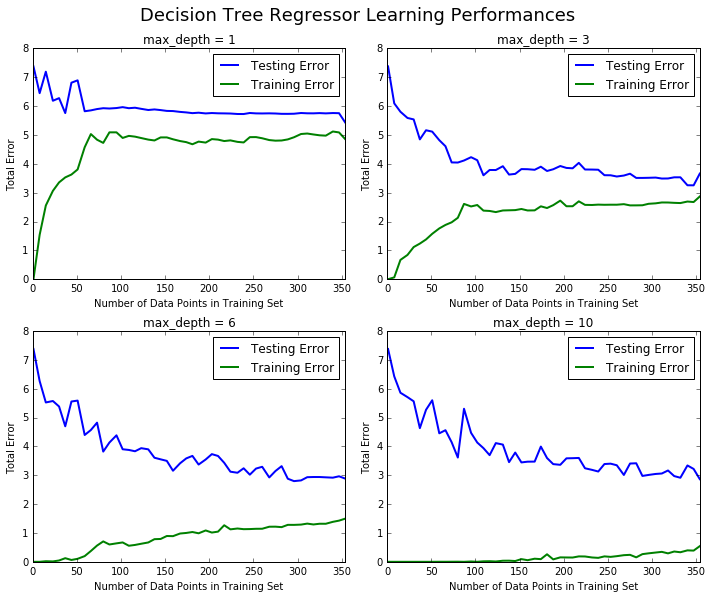

In [9]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **
Max Depth = 3.  
As the size of the training set increases, the training error increases relatively fast at first, then seems to almost plateau past about 100 data points in the training set.  
As training set size increases, testing error decreases sharply at first, then seems to almost plateau once training set size is past 100 data points.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **At a max depth of 1 and using the full training set, testing and training errors are both high and close to one another.  This error value is somewhat high (between 5 and 6, on a population with a median of 21).  It indicates that the model cannot fit the data very well (the model is too simplistic).  This is a good example of high bias.  
At a max depth of 10, however, training error is very low (less than 1) as the model fits the training data very closely (it's actually *over*fitting).  The testing error, though, is still relatively high (at about 3): this is the variance in the source data, the "noise" which the model is not capturing.

Creating a model complexity graph. . . 


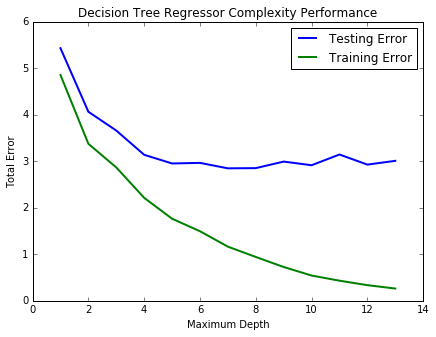

In [10]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **  
__Training error__: As the complexity of the model increases, it fits the underlying training data better and better.  This is a decision tree, so it will always eventually perfectly match the training data, given enough depth.  
Each node of the tree effectively splits the underlying data set into two subsets.  If each node exactly bissected the data set into two subsets of equal size, then all 0.7 \* 509 = 357 points of the training data set would end up in their individual leaf of the decision tree when the tree reaches past 9 levels (there are *2^(d-1)* leaves in a binary tree of depth *d*).  At that point, the training error would be zero, as the tree would perfectly classify each training data point.  
However, the tree doesn't actually bisect equally the data set at each node, so we are still seeing some training error at level 13.  Modifying the code for `model_complexity` shows the model does indeed eventually fit the data perfectly (training error = 0); this occurs once the maximum depth is deep enough, at level 19.  
Training error is behaving as expected for a decision tree: it vanishes as tree depth increases.

__Testing error__:  Like the training error, the testing error starts very high and decreases as model complexity increases.  However, the decrease plateaus out to a value of about 3 ($3,000) after a while.  This plateauing occurs when the maximum depth of the tree is somewhere between 4 and 7.  
From a maximum depth of 1 through 4, testing error decreases as each increase in model complexity allows the model to better fit both the training and testing data sets (decreasing bias); after that, though training error continues decreasing, the decrease in bias is counterbalanced by an increase in variability (increasing overfitting).  The model fails to gain more generalizability (in fact, one can detect a very slight increase in testing error when testing error increases beyond 7).

__"Best" model__:  The testing error is the error we're expecting when the trained model is applied to new data.  So, the best model occurs at the lowest point of that graph, i.e., somewhere between a maximum depth of 4 and 7, say at a max depth of 5 or 6.  
Given that there appears to be very little variation between, I would probably select 5, since a lower tree depth would make the model easier to humanly grasp.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [11]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 4


**Answer: **

As was expected, multiple runs of the model give different values for the optimal `max_depth` parameter, 4, 5, 6, or 7.  The current value on the run when I'm writing this is 5. 

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [12]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 21.630


**Answer: **

As expected, multiple runs of the model give different values for the predicted client value, each corresponding to a different `max_depth` parameter.  As I'm writing this, the predicted value of the client's home is 20.968 (\$20,968).  This price appears to be very close to and slightly lower than the mean price in Boston at that time (\$22,533).

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **

Pricing models are intuitively continuous function models: the price is a function of a number of given input variable, which can be expressed as a linear function of these variables.  At least, that's what intuition would indicate.  Using a decision tree to model such a function does not intuitively make sense: a decision tree model is, by nature, discrete.
I was very surprised to see such model be utilized here, and even more surprised to see how accurate the model actually is at predicting price (I briefly looked at regression as well, but could not get this level of accuracy).  So, from a pure regression perspective, I would definitely look at decision trees.  It would be interesting to note how accurate other modeling approaches can be.